In [1]:
import pandas as pd
import numpy as np

In [3]:
#deleting the inconsistent dates
data=pd.read_csv('dirty_cafe_sales.csv')
data.sort_values('Transaction Date')
data.dtypes!='objects'
data['Transaction Date']=pd.to_datetime(data['Transaction Date'],errors='coerce')
null_values=data.isnull()
cleaned_data=data.dropna(subset=['Transaction Date'])
cleaned_data.to_csv('cleaned_data.csv',index=False)
print("Length of old data:",len(data))
print("lenght of new data:",len(cleaned_data))

#delete_null_values.to_csv('deleted_data.csv')


Length of old data: 10000
lenght of new data: 9540


In [4]:
#deleting all the unknown and error values
datac=pd.read_csv('cleaned_data.csv')
data_cleaned=datac[~datac.isin(["UNKNOWN","ERROR"]).any(axis=1)]
datac['Transaction Date']=pd.to_datetime(datac['Transaction Date'],errors='coerce')
data_cleaned.to_csv('cleaned_data.csv')
print("Length of cleaned data:" ,len(data_cleaned))

Length of cleaned data: 7038


In [5]:
#filling the empty spaces of numeric columns with mean values
datac=pd.read_csv('cleaned_data.csv')
numeric_col=datac.select_dtypes(include=['number']).columns
datac[numeric_col]=datac[numeric_col].apply(lambda col: col.fillna(col.mean()))
datac.to_csv('cleaned_data.csv')

In [6]:
#sorting according to date
datac=pd.read_csv('cleaned_data.csv')
datac['Transaction Date']=pd.to_datetime(datac['Transaction Date'],errors='coerce')
date_sort=datac.sort_values(by=['Transaction Date'])
date_sort.to_csv('cleaned_data.csv')


In [7]:
#fill empty cells of string columns
datac=pd.read_csv('cleaned_data.csv')
string_cols=datac.select_dtypes(include=['object']).columns
datac[string_cols]=datac[string_cols].apply(lambda col: col.fillna(col.mode()[0]))
datac.to_csv('cleaned_data.csv')

In [8]:
#check for null values and duplicate values
datac=pd.read_csv('cleaned_data.csv')
null_data=datac.isnull().sum()
duplicate=datac.duplicated().sum()
print("The null values \n" ,null_data)
print("The duplicate values:" ,duplicate)
print("Length of cleaned data:" ,len(datac))

The null values 
 Unnamed: 0.3        0
Unnamed: 0.2        0
Unnamed: 0.1        0
Unnamed: 0          0
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64
The duplicate values: 0
Length of cleaned data: 7038


In [9]:
#grouping data to find maximum item sold per day
datac=pd.read_csv('cleaned_data.csv')
group1=datac.groupby(['Transaction Date','Item'])[['Quantity','Total Spent']].sum().reset_index()
group1.to_csv('Max_sales_per_day.csv')

datam=pd.read_csv('Max_sales_per_day.csv')
datam['Transaction Date']=pd.to_datetime(datam['Transaction Date'],errors='coerce')
max_sold=datam.loc[datam.groupby('Transaction Date')['Quantity'].idxmax()]
max_sold.to_csv('Max_sales_per_day.csv')


In [10]:
#find maximum item sold per month
datam=pd.read_csv('Max_sales_per_day.csv')
datam['Transaction Date']=pd.to_datetime(datam['Transaction Date'],errors='coerce')
datam['Year-Month']=datam['Transaction Date'].dt.to_period('M')
monthly_sales=datam.groupby(['Year-Month','Item'])[['Quantity','Total Spent']].sum().reset_index()
max_sold=monthly_sales.loc[monthly_sales.groupby('Year-Month')['Quantity'].idxmax()]
rounding1=max_sold['Quantity']=max_sold['Quantity'].round().astype(int)
rounding2=max_sold['Total Spent']=max_sold['Total Spent'].round().astype(int)
max_sold.to_csv('Max_Sales_Per_Month.csv')




In [11]:
#find quantity of each sold item per day
datac=pd.read_csv('cleaned_data.csv')
datac['Transaction Date']=pd.to_datetime(datac['Transaction Date'],errors='coerce')
group2=datac.groupby(['Transaction Date','Item'])[['Quantity']].sum().reset_index()
group2['Transaction Date']=pd.to_datetime(group2['Transaction Date'],errors='coerce')
rounding=group2['Quantity']=group2['Quantity'].round().astype(int)
rounding.to_csv('Each_item_sold_per_day.csv')
group2.to_csv('Each_item_sold_per_day.csv')



In [12]:
#find quantity of each sold item per month
data1=pd.read_csv('Each_item_sold_per_day.csv')
data1['Transaction Date']=pd.to_datetime(data1['Transaction Date'],errors='coerce')
data1['Year-Month']=data1['Transaction Date'].dt.to_period('M')
item_per_month=data1.groupby(['Year-Month','Item'])[['Quantity']].sum().reset_index()
item_per_month.to_csv('Each_item_sold_per_Month.csv')

In [13]:
#find total income per day
datac=pd.read_csv('cleaned_data.csv')
group3=datac.groupby(['Transaction Date'])[['Total Spent']].sum().reset_index()
round=group3['Total Spent']=group3['Total Spent'].round().astype(int)
group3.to_csv('Total_Income_Per_Day.csv')

In [14]:
#find total income per month
data2=pd.read_csv('Total_Income_Per_Day.csv')
data2['Transaction Date']=pd.to_datetime(data2['Transaction Date'],errors='coerce')
data2['Year-Month']=data2['Transaction Date'].dt.to_period('M')
income_per_month=data2.groupby(['Year-Month'])[['Total Spent']].sum().reset_index()
income_per_month.to_csv('Total_Income_Per_Month.csv')

Text(0.5, 1.0, 'Total Quantity Sold Per Item in the Year')

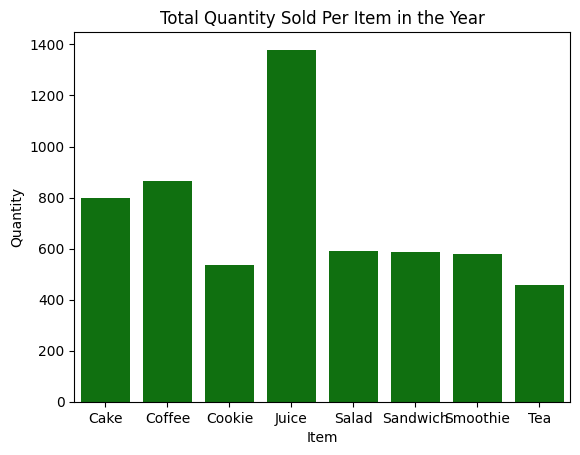

In [ ]:
#bar chart for sales in the year
import matplotlib.pyplot as plt
import seaborn as sns
datac=pd.read_csv('cleaned_data.csv')
datac['Transaction Date']=pd.to_datetime(datam['Transaction Date'],errors='coer ce')
datac['Year']=data2['Transaction Date'].dt.to_period('Y')
each_item_year=datam.groupby(['Item'])[['Quantity']].sum().reset_index()
sns.barplot(x='Item',y='Quantity',data=each_item_year,color='green')
plt.title('Total Quantity Sold Per Item in the Year')



Text(0, 0.5, 'Qunatity')

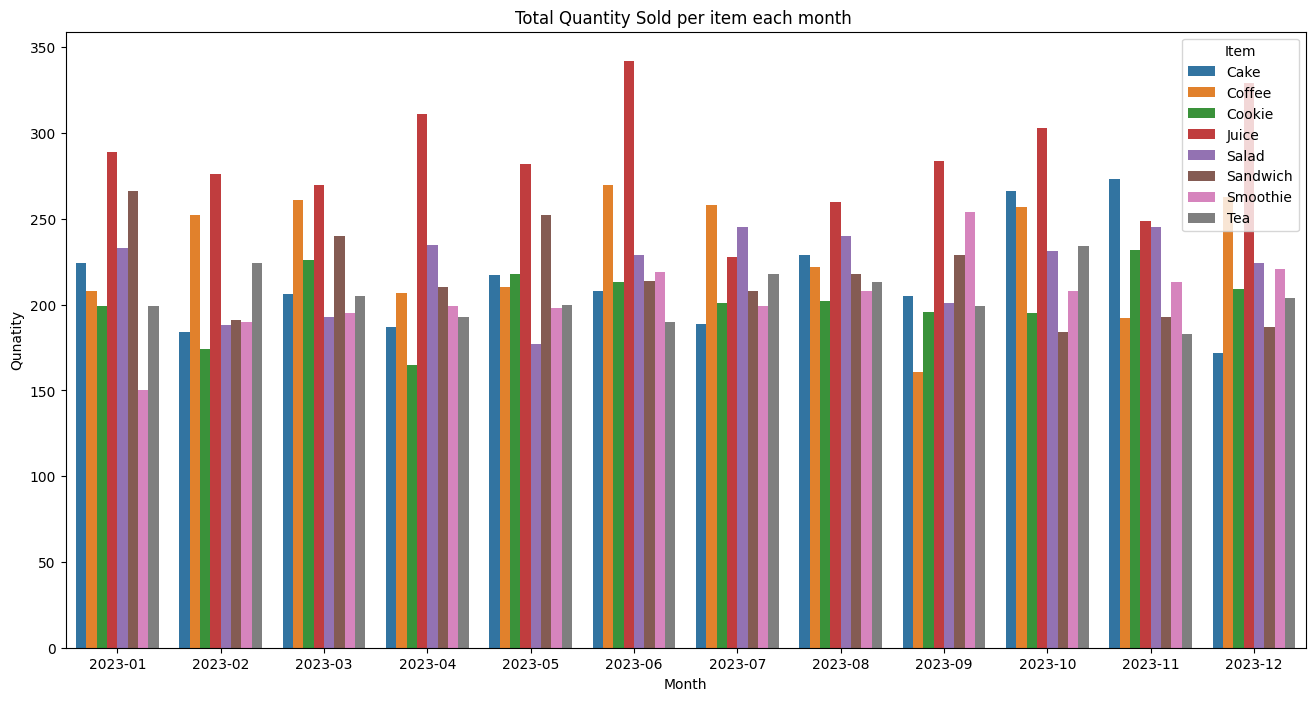

In [16]:
 #bar chart for each item item sold per month
data1=pd.read_csv('Each_item_sold_per_day.csv')
data1['Transaction Date']=pd.to_datetime(data1['Transaction Date'],errors='coerce')
data1['Year-Month']=data1['Transaction Date'].dt.to_period('M').astype(str)
item_per_month=data1.groupby(['Year-Month','Item'])[['Quantity']].sum().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x='Year-Month',y='Quantity',hue='Item',data=item_per_month)
plt.title('Total Quantity Sold per item each month ')
plt.xlabel('Month')
plt.ylabel('Qunatity')


Text(0, 0.5, 'Quantity')

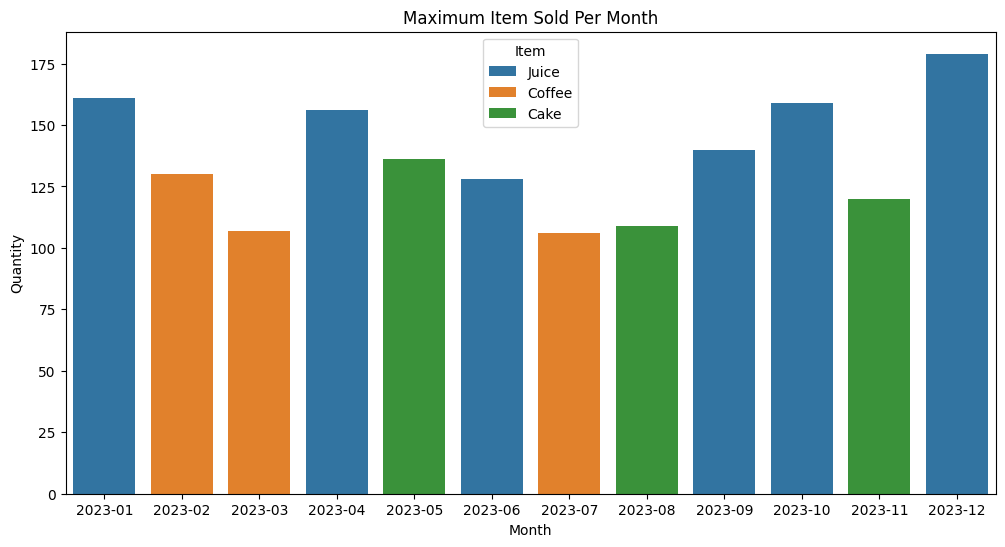

In [17]:
#bar chart for max sales per month
datam=pd.read_csv('Max_sales_per_day.csv')
datam['Transaction Date']=pd.to_datetime(datam['Transaction Date'],errors='coerce')
datam['Year-Month']=datam['Transaction Date'].dt.to_period('M')
monthly_sales=datam.groupby(['Year-Month','Item'])[['Quantity','Total Spent']].sum().reset_index()
max_sold=monthly_sales.loc[monthly_sales.groupby('Year-Month')['Quantity'].idxmax()]
plt.figure(figsize=(12,6))
sns.barplot(x='Year-Month',y='Quantity',hue='Item',data=max_sold)
plt.title('Maximum Item Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Quantity')

Text(0.5, 1.0, 'Payment Type')

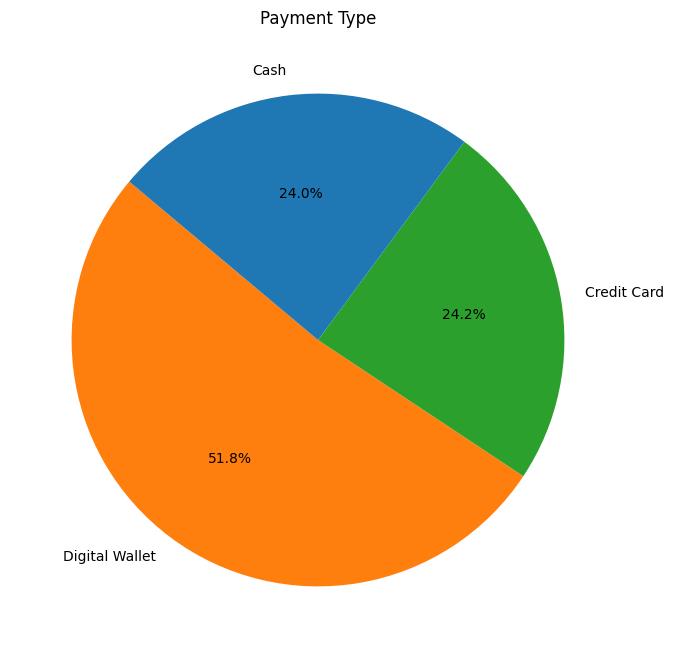

In [18]:
#pie chart for payment method
datac=pd.read_csv('cleaned_data.csv')
payment=datac['Payment Method'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(payment,labels=payment.index,autopct='%1.1f%%',colors=[ "#ff7f0e", "#2ca02c","#1f77b4"],startangle=140)
plt.title("Payment Type")

([<matplotlib.patches.Wedge at 0x2ee2f2c83d0>,
 [Text(-0.16776040583263874, -1.0871322119387634, 'In-store'),
  Text(0.16776050761730255, 1.0871321962318958, 'Takeaway')],
 [Text(-0.09150567590871203, -0.5929812065120528, '67.3%'),
  Text(0.09150573142761957, 0.5929811979446703, '32.7%')])

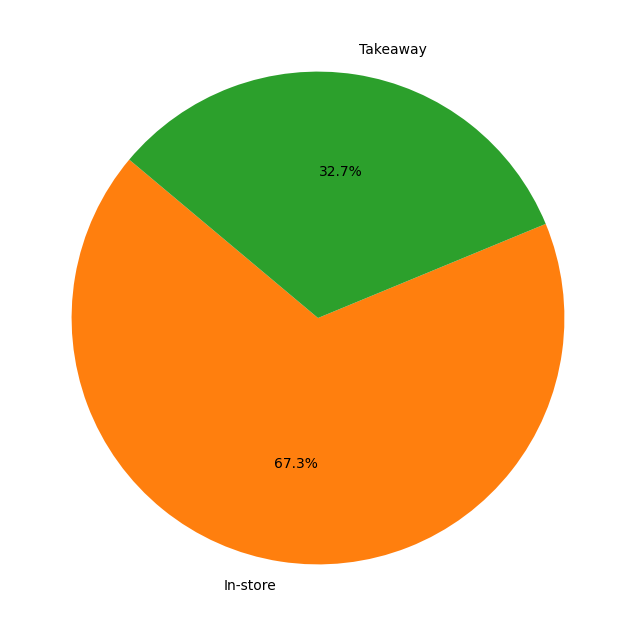

In [19]:
#pie chart for location
datac=pd.read_csv('cleaned_data.csv')
location=datac['Location'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(location,labels=location.index,autopct='%1.1f%%',colors=[ "#ff7f0e", "#2ca02c"],startangle=140)


In [70]:
#To find total revenue
datac=pd.read_csv('cleaned_data.csv')
datac['transaction_date']=pd.to_datetime(datac['transaction_date'],errors='coerce')
datac['transaction_date']=datac['transaction_date'].dt.to_period('M')
sales=datac.groupby(['transaction_date'])[['quantity','total_spent']].sum().reset_index()
sales.to_csv('revenue.csv')
data_revenue=pd.read_csv('revenue.csv')
if 'total_spent' in data_revenue.columns and 'quantity' in data_revenue.columns:
    data_revenue['Total Revenue']=data_revenue['total_spent']*data_revenue['quantity']
else:
    print('Error')

data_revenue.to_csv('revenue.csv')
#print(datac)

In [27]:
#prediction
from prophet import Prophet

data=pd.read_csv('Total_Income_Per_Month.csv')
df=pd.DataFrame()
df['ds']=pd.to_datetime(data['Year-Month'])
df['y']=data['Total Spent']
m=Prophet()
m.fit(df)
future=m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)

# forecast[['ds',  'trend','yhat','yhat_lower','yhat_upper']].tail()
forecast.to_csv('predicted_data.csv')

14:10:23 - cmdstanpy - INFO - Chain [1] start processing
14:10:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\laksh\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [67]:
from sklearn.metrics import r2_score
predicted_df=pd.read_csv('predicted_data.csv')
actual_df=pd.read_csv('revenue.csv')
score=r2_score(predicted_df['trend'],actual_df['Total Revenue'])
print(f"score:{score:.4f}")



ValueError: Found input variables with inconsistent numbers of samples: [24, 7038]

In [9]:
#prediction by regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df=pd.read_csv('Total_Income_Per_Month.csv',
parse_dates=['Year-Month'],index_col='Year-Month')
df['year']=df.index.year
df['month']=df.index.month
x=df[['year','month']]
y=df['Total Spent']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model=LinearRegression()
model.fit(x_poly,y_train)
future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=36,freq='M')
future_data=pd.DataFrame({'year':future_date.year,
                          'month':future_date.month,
                          })

future1=poly.transform(future_data)
future_prediction1=model.predict(future1)
predicted_df1=pd.DataFrame({
    'invoice_date':future_date,
    'Predicted_Total_Spent':future_prediction1
})

predicted_df1.to_csv('predicted_regression.csv')



C:\Users\laksh\AppData\Local\Temp\ipykernel_13156\487201869.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=36,freq='M')


In [2]:
#revenue_prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df=pd.read_csv('revenue.csv',parse_dates=['transaction_date'],index_col='transaction_date')
df['year']=df.index.year
df['month']=df.index.month
x=df[['year','month']]
y=df['Total Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2,shuffle=False)
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model=LinearRegression()
model.fit(x_poly,y_train)
future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=12,freq='M')
future_data=pd.DataFrame({'year':future_date.year,
                          'month':future_date.month,
                          })

future1=poly.transform(future_data)
future_prediction1=model.predict(future1)
predicted_df1=pd.DataFrame({
    'predicted_invoice_date':future_date,
    'Predicted_Revenue':future_prediction1
})
predicted_df1.to_csv('Predicted_revenue.csv')

 

C:\Users\laksh\AppData\Local\Temp\ipykernel_23884\4112533790.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=12,freq='M')


In [ ]:
#merge actual and predicted data
predicted_df=pd.read_csv('Predicted_revenue.csv')
actual_df=pd.read_csv('revenue.csv')
merge_df=pd.concat([predicted_df,actual_df],axis=1)
merge_df.to_csv('accuracy.csv')


In [62]:
actual_df=pd.read_csv('cleaned_data.csv')
revenue_data=pd.read_csv('revenue.csv')
merge=pd.concat([actual_df,revenue_data],axis=1)
merge.to_csv('cleaned_data.csv')

In [22]:
#r2 mean
from sklearn.metrics import r2_score
df=pd.read_csv('accuracy.csv')
score=r2_score(df['Total Revenue'],df['Predicted_Revenue'])
print(f"score:{score:.4f}")

score:0.0656


In [ ]:
#prediction by random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv('revenue.csv',parse_dates=['transaction_date'],index_col='transaction_date')
df['year']=df.index.year
df['month']=df.index.month
x=df[['year','month']]
y=df['Total Revenue']
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x,y)
future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=12,freq='M')
future_data=pd.DataFrame({'year':future_date.year,
                          'month':future_date.month,
                          })


future_prediction1=model.predict(future_data)
predicted_df1=pd.DataFrame({
    'predicted_invoice_date':future_date,
    'predicted_revenue':future_prediction1
})
predicted_df1.to_csv('random_forest_prediction.csv')





C:\Users\laksh\AppData\Local\Temp\ipykernel_13156\2888533421.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=12,freq='M')


In [73]:
#r2 score fro random forest
actual_df=pd.read_csv('revenue.csv')
predicted_df=pd.read_csv('random_forest_prediction.csv')
score=r2_score(actual_df['Total Revenue'],predicted_df['predicted_revenue'])
print(f"score:{score:.2f}")

score:0.79


Text(0, 0.5, 'Actual Revenue')

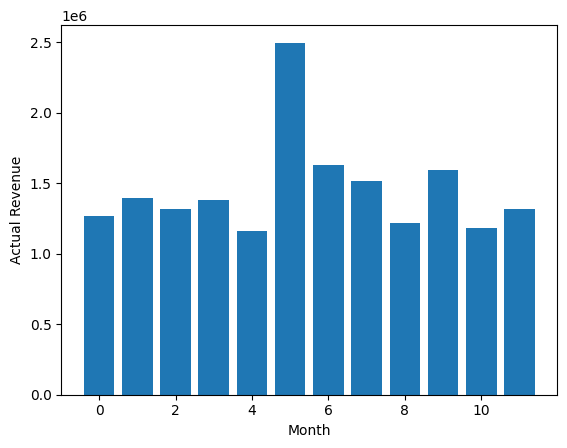

In [12]:
#plotting graph for actual revenue
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('revenue.csv')
# plt.plot(data.index,data['Total Revenue'],label="Actual Revenue")
plt.bar(data.index,data['Total Revenue'],label="Actual Revenue")
plt.xlabel("Month")
plt.ylabel("Actual Revenue")



Text(0, 0.5, 'Actual Revenue')

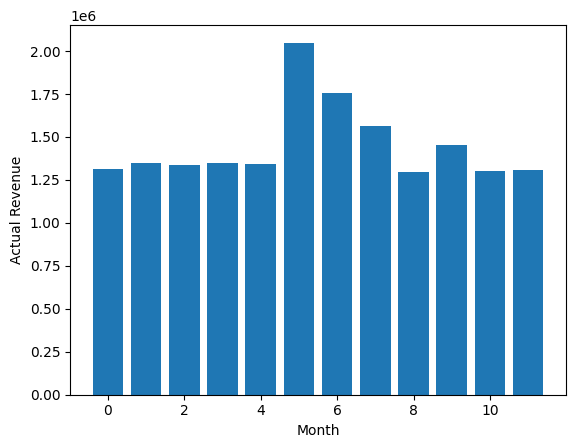

In [13]:
#graph for predicted revenue
import matplotlib.pyplot as plt
data=pd.read_csv('random_forest_prediction.csv')
# plt.plot(data.index,data['Total Revenue'],label="Actual Revenue")
plt.bar(data.index,data['predicted_revenue'],label="Predicted Revenue")
plt.xlabel("Month")
plt.ylabel("Actual Revenue")


Text(0, 0.5, 'Revenue')

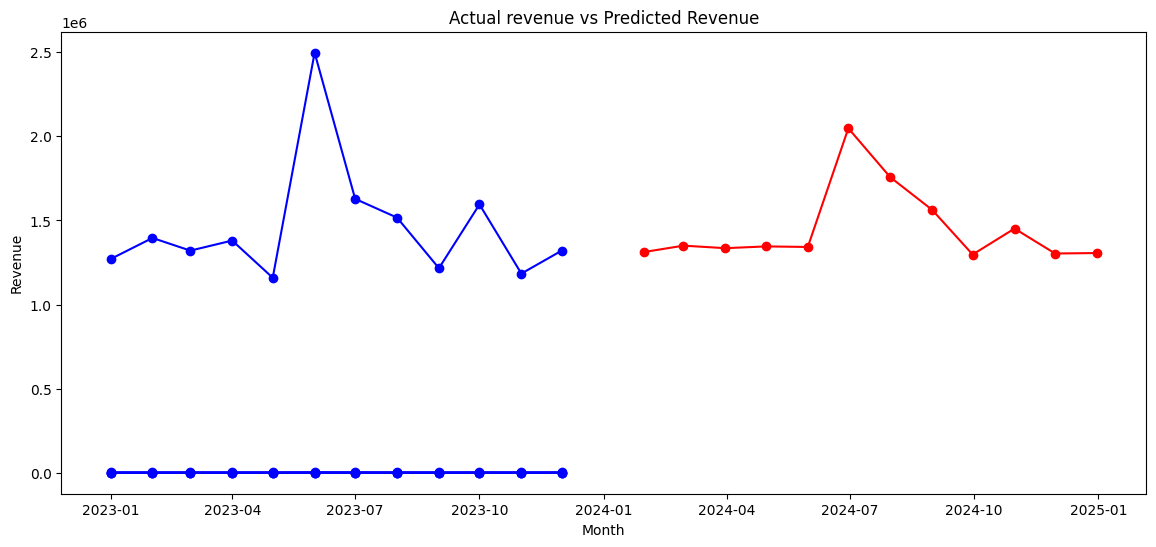

In [27]:
df=pd.read_csv('random_forest_prediction.csv',parse_dates=['predicted_invoice_date'])
actual_df=pd.read_csv('revenue.csv',parse_dates=['transaction_date'])
df.set_index('predicted_invoice_date',inplace=True)
actual_df.set_index('transaction_date',inplace=True)
plt.figure(figsize=(14,6))
plt.plot(actual_df.index,actual_df.values,label="Actual Revenue",color='blue',marker='o')
plt.plot(df.index,df['predicted_revenue'],label="Predicted Revenue",color='red',marker='o')
plt.title("Actual revenue vs Predicted Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")



In [31]:
#prediction by SVM
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df=pd.read_csv('revenue.csv',parse_dates=['transaction_date'],index_col='transaction_date')
df['year']=df.index.year
df['month']=df.index.month
x=df[['year','month']]
y=df['Total Revenue']
scaler=StandardScaler()
x_scalar=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=12,freq='M')
future_data=pd.DataFrame({'year':future_data.year,
                          'month':future_data.month})
future_scaled=scaler.transform(future_data)
future_prediction=svr.predict(future_scaled)
predicted_df=pd.DataFrame({'future_date':future_date,
                           'predicted_revenue':future_prediction})
predicted_df.to_csv('SVM_prediction.csv')

C:\Users\laksh\AppData\Local\Temp\ipykernel_23884\3286962133.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date=pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),periods=12,freq='M')
c:\Users\laksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [34]:
#r2 score for SVM
from sklearn.metrics import r2_score
# y_pred=svr.predict(x_test)
# r2=r2_score(y_test,y_pred)
actual_df=pd.read_csv('revenue.csv')
predicted_df=pd.read_csv('SVM_prediction.csv')
r2=r2_score(actual_df['Total Revenue'],predicted_df['predicted_revenue'])
print("R2 Score:",r2)

R2 Score: -0.049126703382943004


In [35]:
#MAE 
from sklearn.metrics import mean_absolute_error
actual_df=pd.read_csv('revenue.csv')
predicted_df=pd.read_csv('SVM_prediction.csv')
score = mean_absolute_error(actual_df["Total Revenue"], predicted_df["predicted_revenue"])
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 211894.45
